In [1]:
# Import some necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#The following commands set maximum my rows and columns could display
#pd.options.display.max_rows = 20
#pd.options.display.max_columns = 20

In [2]:
crime = pd.read_csv('~/Desktop/dc_crime_add_vars.csv')
# read data and store it in crime
unemp = pd.read_csv('~/Desktop/DC_unemployment.csv')
# read data and store it in unemp

In [3]:
crime.columns
# check clumns

Index(['Unnamed: 0', 'X', 'REPORT_DAT', 'SHIFT', 'OFFENSE', 'METHOD', 'BLOCK',
       'DISTRICT', 'PSA', 'WARD', 'ANC', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP',
       'CENSUS_TRACT', 'VOTING_PRECINCT', 'CCN', 'START_DATE', 'END_DATE',
       'XBLOCK', 'YBLOCK', 'optional', 'date', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'EW', 'NS', 'quad', 'crimetype'],
      dtype='object')

In [4]:
crime.isnull().sum()
# Display the missing values in our dataset

Unnamed: 0                  0
X                           0
REPORT_DAT                  0
SHIFT                       0
OFFENSE                     0
METHOD                      0
BLOCK                       0
DISTRICT                  200
PSA                       251
WARD                        0
ANC                         0
NEIGHBORHOOD_CLUSTER     4705
BLOCK_GROUP              1091
CENSUS_TRACT             1091
VOTING_PRECINCT            84
CCN                         0
START_DATE                 13
END_DATE                11651
XBLOCK                      0
YBLOCK                      0
optional                    0
date                        0
year                        0
month                       0
day                         0
hour                        0
minute                      0
second                      0
EW                          0
NS                          0
quad                        0
crimetype                   0
dtype: int64

In [5]:
unemp.isnull().sum()
# no missing data in unemplotment dataset

Year                 0
Ward                 0
Unemployment Rate    0
dtype: int64

# 1
Filter out your data to examine the violent crimes. For 4 fields of your choice(2 numerical
& 2 categorical), examine the distribution of the values, and explain any interesting
insight you get from this. How do the distributions on violent crimes compare to the
non-violent ones(show with visual analysis)? 

In [6]:
import seaborn as sns
%matplotlib inline

In [7]:
violent = crime.loc[crime['crimetype'] == 'Violent']

In [8]:
nonvio = crime.loc[crime['crimetype'] == 'Non-Violent']

In [9]:
vioselect = violent[['quad','METHOD','month','year']]
nonselect = nonvio[['quad','METHOD','month','year']]

In [10]:
y = pd.DataFrame(crime).groupby("crimetype").count().reset_index()
y = pd.DataFrame(y,columns=['X','crimetype'])
y.rename(columns={'X': 'Count'},inplace = True)
y # check total amounts of violent crimes and non-violent crimes

,Count,crimetype
0,280528,Non-Violent
1,62339,Violent


# Examine 4 variables separately in violent crimes followed by non-violent crimes

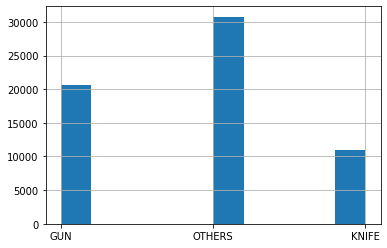

In [11]:
vioselect['METHOD'].hist()
#In violent crimes, guns are used more than knives

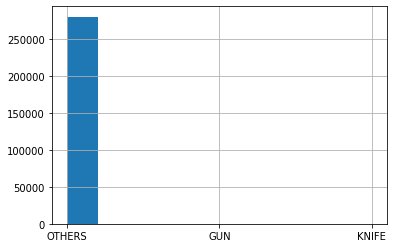

In [12]:
nonselect['METHOD'].hist()
# In non-violent crimes, no guns or knives are used
# In both non-violent crimes， the 'others' method are the most often used.

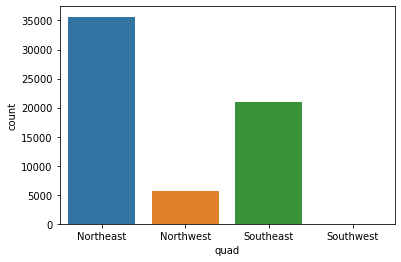

In [13]:
sns.countplot(vioselect['quad'])
# Violent crimes happen mostly on Northeast. They also happen on Southeast quite often.

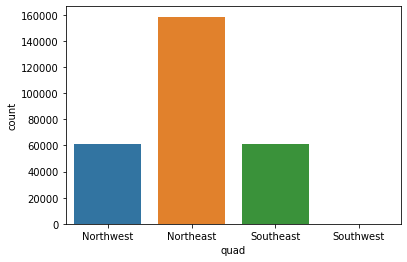

In [14]:
sns.countplot(nonselect['quad'])
# Non-violent crimes happen mostly on Northeast. They also happens on Northwest and Southeast about the same frequency.
# Both violent and non-violent crimes never happen on Southwest.
# Both violent and non-violent crimes happen on Northeast the most often. 

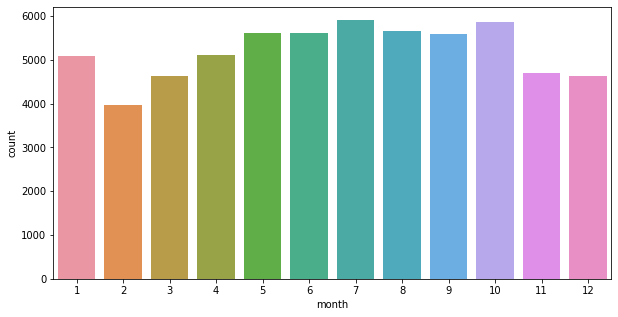

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(vioselect['month'])
# Violent crimes happen in July and October the most often.
# Violent crimes increse from February to July.

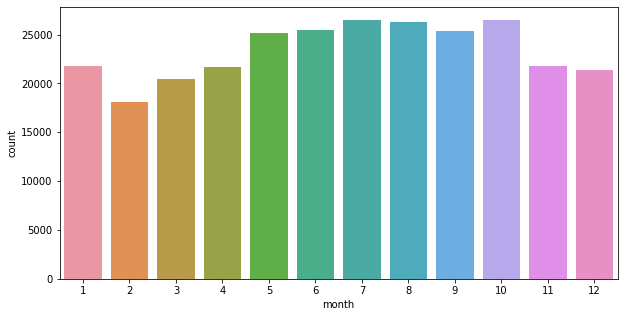

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(nonselect['month'])
# Non-violent crimes happen mostly in summer(June,July,August)
# Both violent and non-violent crimes have almost the same distibution in a year. 
# This means when the non-violent increases, the violent crimes will generally increase.

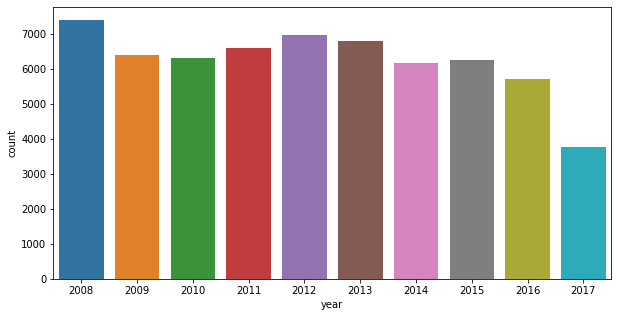

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(vioselect['year'])
# Violent crimes decreased from 2012 to 2017, and 2008 has the most number of violent crimes in these years.

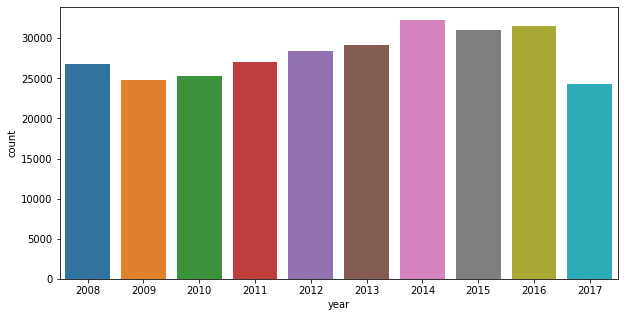

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(nonselect['year'])
# Non-iolent crimes increased from 2008 to 2014 and then decreased from 2014 to 2017.
# We can see that both violent and non-violent crimes increased from 2009 to 2012.

# 2
Often in Data Science, you won’t be able to find one dataset with all the information
required for your analyses. Instead, you will have to find datasets from multiple sources
and fuse them together yourself to proceed with your analytics. For this task, you are
required to combine both datasets given to you ( HINT : Dataframes can be combined
using the pandas merge function).

a. Which “ward” reported the most criminal activity based on the data presented?
Justify with a plot. ( 3 points )

b. Which “ward” reported the highest average unemployment rates? ( 2 points )

c. For the ward from part b, plot the trends between the number of crimes occurring
in this ward along with the unemployment rate of this ward based on the years
chronologically present in the datasets. Note that you may have to clean the data
to exclude some years which may not have data for the entire year, as this will
skew your analysis. Explain your procedure and what you observed. ( 5 points )

In [19]:
df = pd.DataFrame(crime)
df2 = pd.DataFrame(unemp)
# Make data frames of our 2 datasets

In [20]:
byWARD = df.groupby('WARD')
x=pd.DataFrame(byWARD.count()['X'])
x

,X
WARD,
1,49028
2,62277
3,18371
4,31164
5,44979
6,53184
7,42675
8,41189


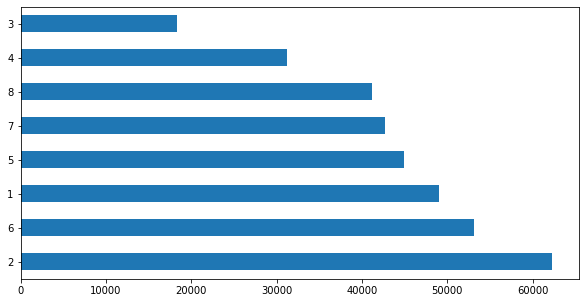

In [21]:
df['WARD'].value_counts().head(8).plot(kind='barh',figsize=(10,5))

# Q2.ans.a:
Ward 2 has the most crime activity (62277)

In [22]:
df2 = pd.DataFrame(unemp,columns=['Ward','Unemployment Rate'])
byWard = df2.groupby("Ward")
un = byWard.mean().reset_index()
un.set_index('Ward',inplace = True)
un # Unemployment rate grouped by ward

,Unemployment Rate
Ward,
1,5.72
2,4.03
3,3.42
4,7.44
5,10.75
6,6.59
7,14.25
8,18.34


Text(0.5, 1.0, 'Unemployment by Ward')

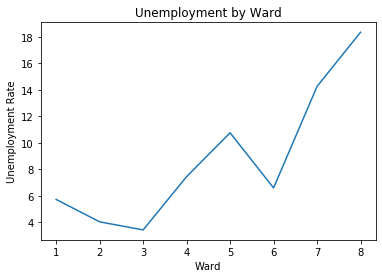

In [23]:
plt.plot(un)
plt.xlabel('Ward')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment by Ward')
# ward8 has the highest unemployment rate

# Q2.ans.b: 
Ward 8 has the highest unemployment rate

In [24]:
print(np.unique(df[df["year"]==2008]["month"]))
print(np.unique(df[df["year"]==2009]["month"]))
print(np.unique(df[df["year"]==2010]["month"]))
print(np.unique(df[df["year"]==2011]["month"]))
print(np.unique(df[df["year"]==2012]["month"]))
print(np.unique(df[df["year"]==2013]["month"]))
print(np.unique(df[df["year"]==2014]["month"]))
print(np.unique(df[df["year"]==2015]["month"]))
print(np.unique(df[df["year"]==2016]["month"]))
print(np.unique(df[df["year"]==2017]["month"]))
print(np.unique(df[df["year"]==2018]["month"]))

# We find that 2017 lose the information of December, so we will exclude 2017 from our analysis

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11]
[]


In [25]:
w1 = df[(df['WARD']== 8) & (df['year']!=2017)]
w1['year'].unique()
# Now we have excluded 2017

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [26]:
d2 = pd.DataFrame(unemp)
w2 = pd.DataFrame(d2[d2['Ward']== 8])
w2.rename(columns = {'Year':'year'},inplace = True)
by1 = w1.groupby(["year"]).count().reset_index()
by2 = w2.groupby(["year"]).mean().reset_index()
m = pd.merge(by1,by2,on = ['year'],how = 'inner')
combine = pd.DataFrame(m,columns=['year','X','Unemployment Rate'])
combine.rename(columns={"X": "Crime amounts"},inplace = True)
combine.head(10)
combine.set_index('year',inplace = True)
# The new data frame contains the total crimes and average unemployment rate in each year for ward 8

In [27]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


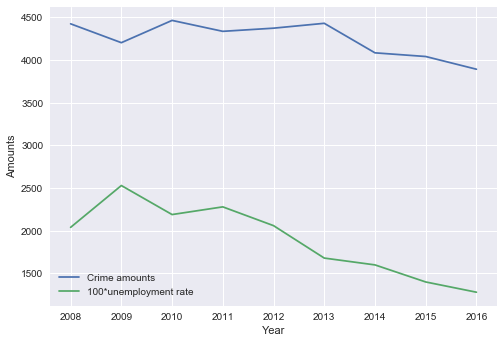

<Figure size 3600x800 with 0 Axes>

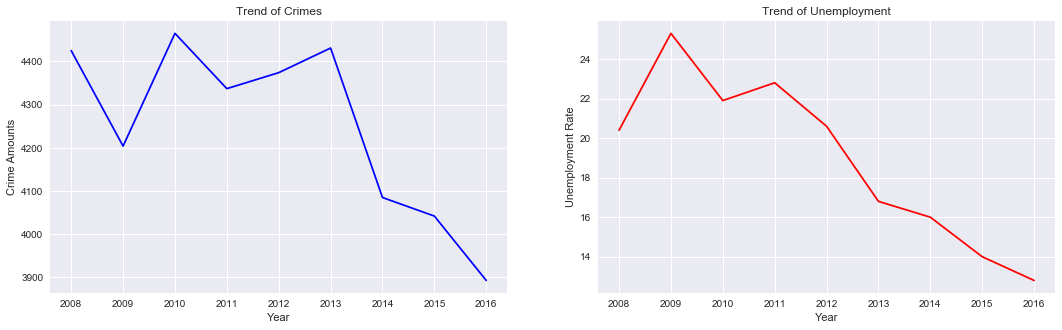

In [28]:
# The first plot show crime amounts and unemplyment rate in a same plot
#To see more clearly how the unemployment rate varies along with the number of crimes, 
#we plot 100*unemployment rate vs year instead
plt.style.use('seaborn')
plt.plot(combine.index.values,combine['Crime amounts'])
plt.plot(combine.index.values,combine['Unemployment Rate']*100)
plt.legend(['Crime amounts','100*unemployment rate'])
plt.xlabel('Year')
plt.ylabel('Amounts')
plt.xticks(combine.index.values) 

# The second plot shows original data(Crimes and Unemployment versus year) 
fig = plt.figure(figsize=(18,4), dpi=200)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,5))
axes[0].plot(combine.index.values,combine['Crime amounts'],'b')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Crime Amounts')
axes[0].set_title('Trend of Crimes')
axes[0].set_xticks(ticks= combine.index, minor=False)
axes[1].plot(combine.index.values,combine['Unemployment Rate'],'r')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Unemployment Rate')
axes[1].set_title('Trend of Unemployment')
axes[1].set_xticks(ticks= combine.index, minor=False)

# Q2.ans.c:
We can see that in general, the trend of crimes follows the trend of unemployment rate.

The unemployment rate reaches a peak in 2009 and then crimes amounts also reaches a peak in 2010.

Then from 2013 to 2016, both the unemployment rate and crime amount goes down in general.

# 3
XBLOCK and YBLOCK refer to the coordinates of where a certain crime has taken place.

a. For the year 2016, plot a scatter plot based on these coordinates, where the
points represent the crimes in that year, and the crimes are color coded based on
DISTRICT. You may have to handle missing values, explain how you handled
these rows. ( 5 points )

b. Plot a scatter plot for the same year as above, where the crimes are color coded
based on OFFENSE . Explain what you observed( HINT: Playing around with the
opacity of the points may help you make interesting observations. For seaborn,
this can be done using the “alpha” parameter). ( 5 points )


In [29]:
dfQ3 = pd.DataFrame(crime)

In [30]:
dfQ3 = dfQ3[dfQ3['year'] == 2016].dropna() # The data of 2016 dropping null values

# Q3.ans.a 
I dropped the na values

In [31]:
dfQ3[dfQ3['year'] == 2016].isna().sum() # Now our data does not contain null values

Unnamed: 0              0
X                       0
REPORT_DAT              0
SHIFT                   0
OFFENSE                 0
METHOD                  0
BLOCK                   0
DISTRICT                0
PSA                     0
WARD                    0
ANC                     0
NEIGHBORHOOD_CLUSTER    0
BLOCK_GROUP             0
CENSUS_TRACT            0
VOTING_PRECINCT         0
CCN                     0
START_DATE              0
END_DATE                0
XBLOCK                  0
YBLOCK                  0
optional                0
date                    0
year                    0
month                   0
day                     0
hour                    0
minute                  0
second                  0
EW                      0
NS                      0
quad                    0
crimetype               0
dtype: int64

In [32]:
# I will use sns.lmplot, setting the parameter 'hue' to one of the columns will color the plot according to its values.
# Set scatter = True and fit_reg=False will show the scatter plot.
sns.set(color_codes=True)

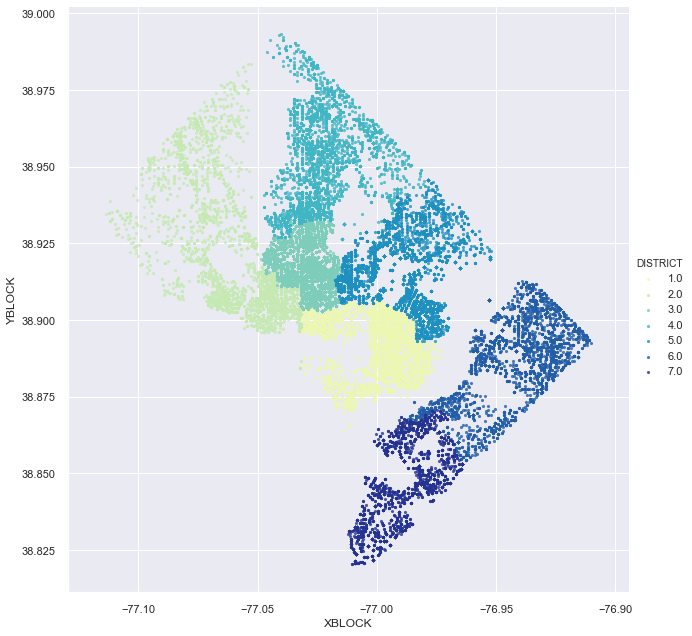

In [33]:
sns.lmplot(x='XBLOCK',y='YBLOCK',data=dfQ3, hue='DISTRICT',palette='YlGnBu',fit_reg=False, scatter = True,
           height = 9, markers = 'o', scatter_kws={'s':10})

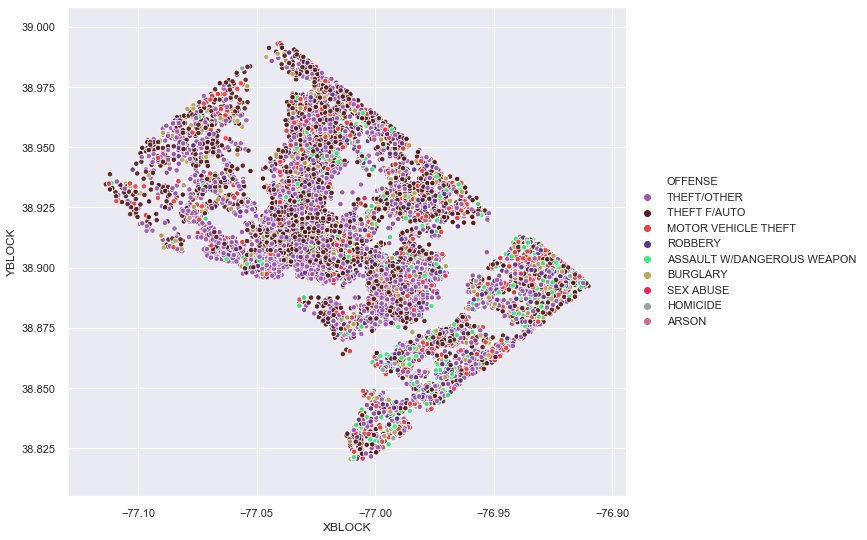

In [34]:
plt.figure(figsize = (10,9))#adjust the size of the plot. Alternative way : fig.set_size_inches(11.7, 8)
d = {'SEX ABUSE':"#E9285C","THEFT/OTHER": "#9b59b6", 'THEFT F/AUTO': '#511C1C', 'MOTOR VEHICLE THEFT': '#EC3E3E', "ROBBERY": "#5C308E", "HOMICIDE": "#95a5a6", 'ASSAULT W/DANGEROUS WEAPON': '#3EEC7E', "BURGLARY": '#BCA55B', "ARSON": "#D1698F"}
# d is the dictionary I used to code different offenses to different colors.
g= sns.scatterplot(x='XBLOCK',y='YBLOCK',hue='OFFENSE', data = dfQ3,alpha = 0.9, palette=d, s = 28)
# For part b, I used a different method instead of sns.lmplot
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Q3.ans.b:
From the plot, we can see that Theft happens most frequently.

Also the crimes mainly happens in the middle of the map. 

The density of dots representing 'Theft' also increased in the middle of the map.

# 4
Make your best educated guess as to which time of the day was the most dangerous in
the D.C. area. Note that we are defining “danger” to be any violent crime for the purpose
of this question. Explain your inference with suitable plots. ( 5 points )

In [35]:
dfq4 = pd.DataFrame(violent)
# I will exhbit two ways, the first one considers the hour of one day only
byHour = dfq4.groupby('hour')
x=pd.DataFrame(byHour.count()['X'])# The dataframe contains data grouped by 'hour'
## The second one considers the hour and also the day in the month 
byTime = dfq4.groupby(['day','hour'])
h = pd.DataFrame(byTime.count())# The dataframe contains data grouped by 'day' and 'hour' 

Text(0, 0.5, 'Total Number of Crimes')

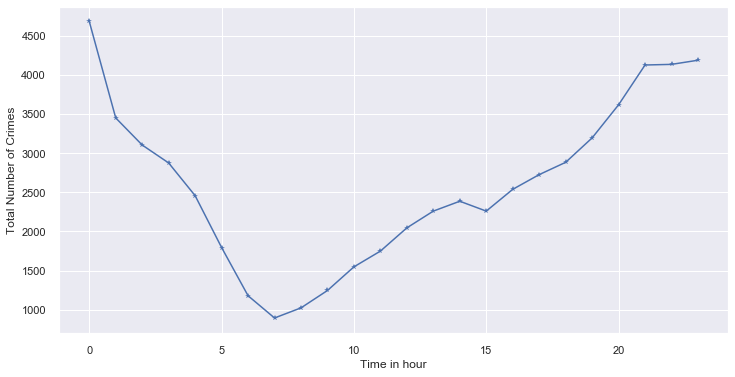

In [36]:
plt.figure(figsize=(12,6))
plt.plot(x,marker = '*')
plt.xlabel('Time in hour')
plt.ylabel('Total Number of Crimes')
# Withour using groupby : plt.plot(dfq4['hour'].value_counts().sort_index(),marker = '*',markersize = 10)

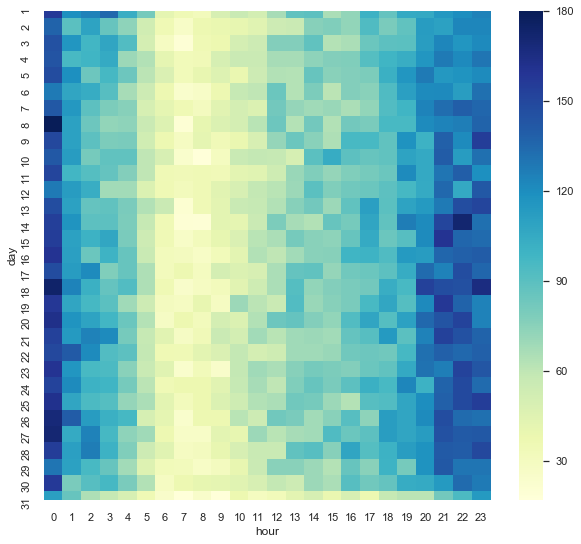

In [37]:
pvVio = h.pivot_table(values='X',index='day',columns='hour')
plt.figure(figsize = (10,9))#adjust the size of the plot
sns.heatmap(pvVio,cmap="YlGnBu")# The color will represent the number of crimes in each day and hour.

# Q4.ans:
The color represents the amount of crimes, the darker the color, the more cases it has.

The violent crimes will happen mostly on night. The crimes happened around 12:00 am the most often.

The situation is the same through the entire month.

And at the end of a month, the crimes amounts will genearally increases.

# 5
Create two plots(at least one unique plot not used above) of your own using the dataset
that you think reveals something very interesting. Explain what it is, and anything else
you learned. ( 10 points )

In [38]:
sns.set_style('ticks')

In [39]:
dfQ5 = pd.DataFrame(crime,columns = ['year','X','WARD','OFFENSE'])
b5 = dfQ5.groupby(["year","WARD"],as_index=False).count()
t5 = pd.DataFrame(b5)
# The 'new' data frame contains ward, offense and X as the total number of crimes happend 

In [40]:
pv5 = t5.pivot_table(values='X',index='WARD',columns='year')
# I create a pivot table where the index is ward, the column is year, and the value is number of crimes
pv5

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
WARD,,,,,,,,,,
1,4926,4433,4358,4924,5017,5411,5415,5265,5442,3837
2,6298,5790,5548,6212,6571,5960,6779,6772,7290,5057
3,1884,1962,1929,1935,1789,1950,1832,1917,1794,1379
4,3012,2870,3091,2930,2992,3264,3808,3549,3193,2455
5,4119,3703,3975,4317,4780,4608,5396,5199,4896,3986
6,5172,4492,4223,4870,5520,5680,6026,6103,6398,4700
7,4372,3756,4008,4049,4342,4615,5107,4469,4277,3680
8,4425,4204,4465,4337,4374,4431,4085,4042,3893,2933


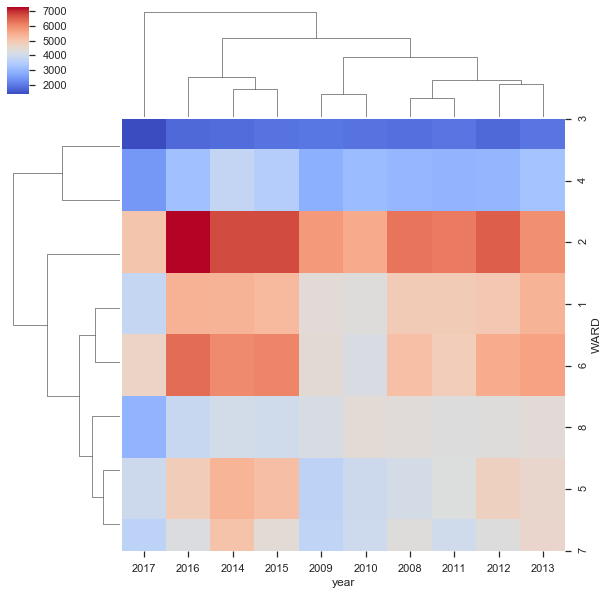

In [41]:
sns.clustermap(pv5,cmap='coolwarm')
# The color in each square represents the crimes amount
# The x and y axis represent year and ward sepretaly

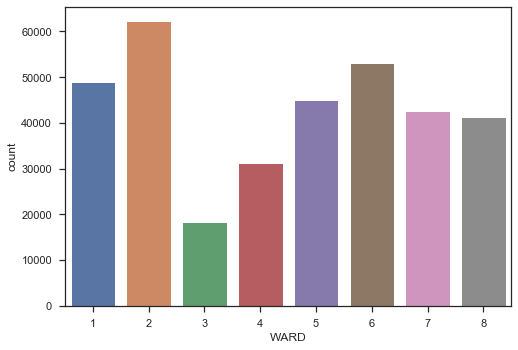

In [42]:
sns.countplot(dfQ5['WARD'])



# Q5.ans:
Ward 3 and 4 remains relatively safe during the whole time from 2010 to 2017.

In contrast ward 2 remains dangerous all the time.

Ward 8' crime amount does not change much over the time.

The number of crimes in ward 2 in 2016 was very large. 

From 2014 to 2016, the number of crimes in ward 5 is greater than those in other years in ward 5.

# 6

For all the tasks above, please include an explanation wherever asked and make sure that your procedure is documented (suitable comments) as well as you can. 

Don’t forget to label all plots and include legends wherever necessary as this is key to making good visualizations! 
Ensure that the plots are visible enough by playing with size parameters. 

Be sure to use appropriate color schemes wherever possible to maximize the ease of understandability. 

Everything must be laid out in a python notebook(.ipynb).